In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2022-12-31'
stock ='GOOG'

data = yf.download(stock, start ,end)


[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2763,2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000
2764,2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900
2765,2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600
2766,2022-12-29,87.029999,89.364998,86.989998,88.949997,88.949997,18280700


In [5]:
ma_100_days =data.Close.rolling(100).mean()

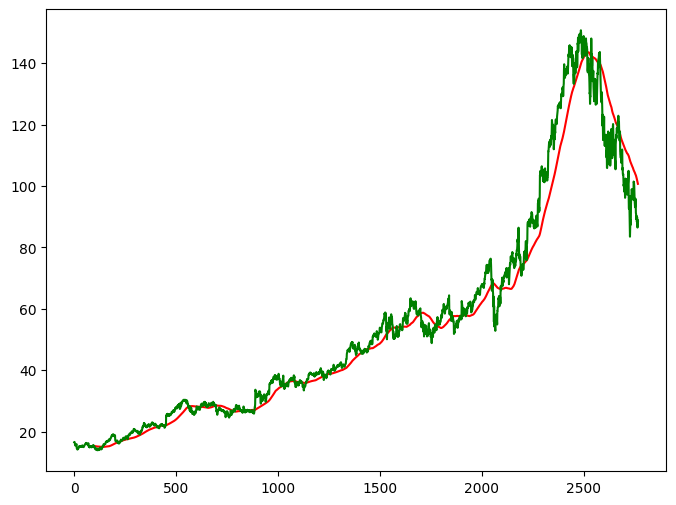

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days =data.Close.rolling(200).mean()

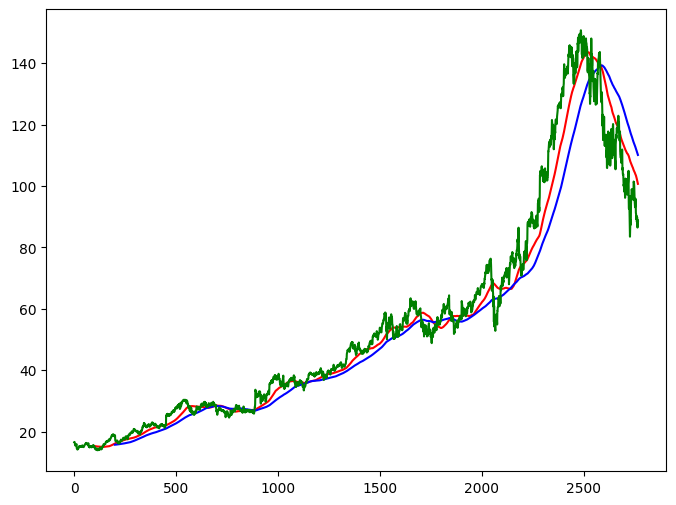

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train =pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test =pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [11]:
data_train.shape[0]

2214

In [12]:
data_test.shape[0]

554

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale =scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range (100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x , y =np.array(x) ,np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [18]:
model =Sequential()
model.add(LSTM(units =50,activation = 'relu' ,return_sequences = True,
               input_shape =((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation ='relu',return_sequences =True))
model.add(Dropout(0.3))

model.add(LSTM(units= 80, activation= 'relu' ,return_sequences =True))
model.add(Dropout(0.4))

model.add(LSTM(units =120 ,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\shriy\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer ='adam' , loss ='mean_squared_error')

In [20]:
model.fit(x,y, epochs =50, batch_size =32 ,verbose =1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 16s 149ms/step - loss: 0.0746
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 0.0067
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - loss: 0.0070
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - loss: 0.0049
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 194ms/step - loss: 0.0052
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 248ms/step - loss: 0.0049
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - loss: 0.0052
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 0.0083
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - loss: 0.0048
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 0.0041
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0040
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0034
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0033
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 0.0032
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 

In [21]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days =data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days ,data_test], ignore_index=True)


In [24]:
data_test_scale =scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range (100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
    

In [26]:
x,y =np.array(x) ,np.array(y)
y_predict =model.predict(x)
 

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step


In [27]:
scale  = 1/scaler.scale_

In [28]:
y_predict =y_predict*scale

In [29]:
y=y*scale

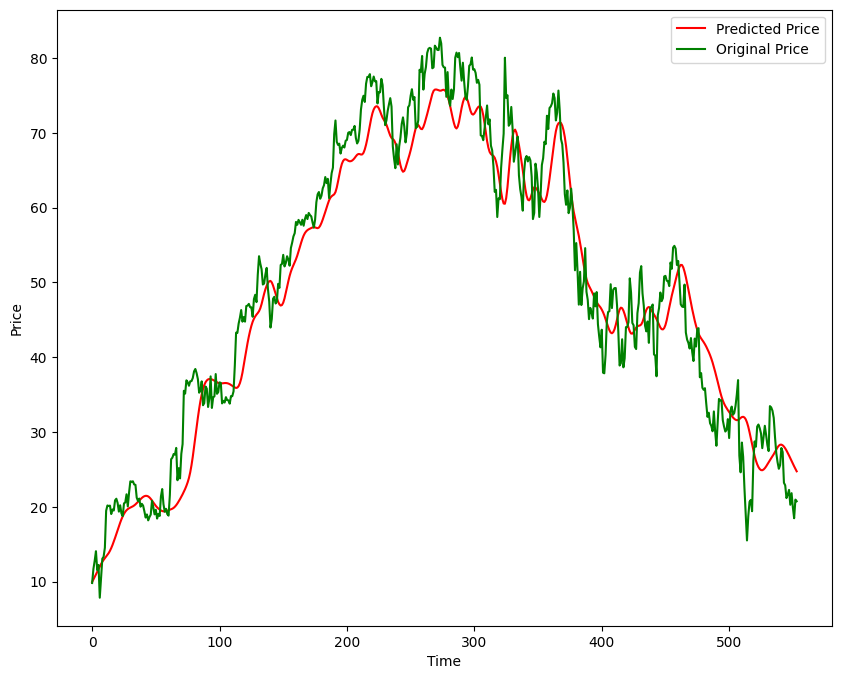

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r' , label ='Predicted Price' )
plt.plot(y, 'g', label ='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('Stock Predictions Model.keras')